In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm

In [2]:
# !curl https://raw.githubusercontent.com/JieYingWu/COVID-19_US_County-level_Summaries/master/data/counties.csv  -o ./counties.csv
# !curl https://raw.githubusercontent.com/JieYingWu/COVID-19_US_County-level_Summaries/master/data/deaths_timeseries.csv -o ./deaths_timeseries.csv

In [3]:
counties = pd.read_csv('../data/raw/counties_05-08.csv')
print(counties.columns.values)
counties = counties.dropna(how='any')
# counties['FIPS'] = counties['FIPS'] .astype('int')
counties = counties.set_index('FIPS')
# print(counties.where(counties['FIPS'] == 36061))
print(counties.loc[36061,])
counties = counties.filter(['FIPS', 'Rural-urban_Continuum Code_2013', 'Density per square mile of land area - Population', 'Total Hospitals (2019)'])
counties = counties.dropna()
counties.head(20)

['FIPS' 'State' 'Area_Name' 'Rural-urban_Continuum Code_2013'
 'Urban_Influence_Code_2013' 'Economic_typology_2015' 'POP_ESTIMATE_2018'
 'N_POP_CHG_2018' 'Births_2018' 'Deaths_2018' 'NATURAL_INC_2018'
 'INTERNATIONAL_MIG_2018' 'DOMESTIC_MIG_2018' 'NET_MIG_2018'
 'RESIDUAL_2018' 'GQ_ESTIMATES_2018' 'R_birth_2018' 'R_death_2018'
 'R_NATURAL_INC_2018' 'R_INTERNATIONAL_MIG_2018' 'R_DOMESTIC_MIG_2018'
 'R_NET_MIG_2018' 'Less than a high school diploma 2014-18'
 'High school diploma only 2014-18'
 "Some college or associate's degree 2014-18"
 "Bachelor's degree or higher 2014-18"
 'Percent of adults with less than a high school diploma 2014-18'
 'Percent of adults with a high school diploma only 2014-18'
 "Percent of adults completing some college or associate's degree 2014-18"
 "Percent of adults with a bachelor's degree or higher 2014-18"
 'POVALL_2018' 'CI90LBAll_2018' 'CI90UBALL_2018' 'PCTPOVALL_2018'
 'CI90LBALLP_2018' 'CI90UBALLP_2018' 'POV017_2018' 'CI90LB017_2018'
 'CI90UB017_2018' '

,Rural-urban_Continuum Code_2013,Density per square mile of land area - Population,Total Hospitals (2019)
FIPS,,,
1003,3.0,114.6,4.505074
1015,3.0,195.7,2.361351
1043,4.0,109.4,1.724195
1049,6.0,91.5,1.475056
1051,2.0,128.2,1.692063
1055,3.0,195.2,2.118018
1069,3.0,175.1,2.163912
1073,1.0,592.5,13.623375
1077,3.0,138.8,1.909029


In [4]:
counties.columns.values

array(['Rural-urban_Continuum Code_2013',
       'Density per square mile of land area - Population',
       'Total Hospitals (2019)'], dtype=object)

In [5]:
# counties = counties.set_index('FIPS')

In [6]:
counties.head()

,Rural-urban_Continuum Code_2013,Density per square mile of land area - Population,Total Hospitals (2019)
FIPS,,,
1003,3.0,114.6,4.505074
1015,3.0,195.7,2.361351
1043,4.0,109.4,1.724195
1049,6.0,91.5,1.475056
1051,2.0,128.2,1.692063


In [7]:
counties.loc[1003,]

Rural-urban_Continuum Code_2013                        3.000000
Density per square mile of land area - Population    114.600000
Total Hospitals (2019)                                 4.505074
Name: 1003, dtype: float64

In [8]:
deaths = pd.read_csv('../data/raw/time_series_covid19_deaths_US_05-08.csv')
# print(filtered.loc[36061,])
# print(deaths.columns.values)
deaths = deaths.drop(['UID', 'iso2', 'iso3', 'code3', 'Admin2', 'Population', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1)
# deaths = deaths.dropna()
deaths = deaths.set_index('FIPS')

deaths.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
FIPS,,,,,,,,,,,,,,,,,,,,,
60.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66.0,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,5
69.0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
72.0,0,0,0,0,0,0,0,0,0,0,...,86,86,92,94,95,97,97,99,99,102
78.0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [9]:
total_deaths = pd.DataFrame(deaths.sum(axis=1), columns=['deaths'])
# total_deaths.columns = ['FIPS', 'deaths']
total_deaths.head()

,deaths
FIPS,
60.0,0
66.0,184
69.0,68
72.0,2246
78.0,86


In [10]:
combined_data = counties.merge(total_deaths, left_on='FIPS', right_on='FIPS')
combined_data.dropna()
combined_data.head(20)

,Rural-urban_Continuum Code_2013,Density per square mile of land area - Population,Total Hospitals (2019),deaths
FIPS,,,,
1003,3.0,114.6,4.505074,92
1015,3.0,195.7,2.361351,60
1043,4.0,109.4,1.724195,18
1049,6.0,91.5,1.475056,43
1051,2.0,128.2,1.692063,34
1055,3.0,195.2,2.118018,252
1069,3.0,175.1,2.163912,86
1073,1.0,592.5,13.623375,1000
1077,3.0,138.8,1.909029,102


In [11]:
combined_data = combined_data.drop(index=36061)

In [12]:
combined_data.to_csv('../data/intermediates/pre_acpca.csv')

In [13]:
# print(combined_data['Total Hospitals (2019)'].values)
# print(combined_data['deaths'].values)

Text(0, 0.5, 'total deaths')

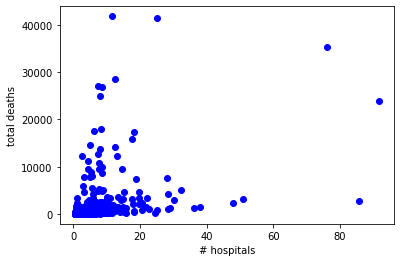

In [14]:
plt.plot(list(combined_data['Total Hospitals (2019)'].values), list(combined_data['deaths'].values), 'bo')
plt.xlabel('# hospitals')
plt.ylabel('total deaths')

In [15]:
filter1 = combined_data['Total Hospitals (2019)'] < 20
filter2 = combined_data['deaths'] > 300000
filtered = combined_data.where(filter1)
filtered.where(filter2, inplace=True)
filtered = filtered.dropna()
filtered.head()

,Rural-urban_Continuum Code_2013,Density per square mile of land area - Population,Total Hospitals (2019),deaths
FIPS,,,,


In [16]:
data_arr = combined_data.to_numpy()
X = data_arr[:,2].reshape(1, -1).T
Y = data_arr[:,3].reshape(1, -1).T
reg = lm.LinearRegression().fit(X,Y)
reg.score(X,Y)

0.17965656579987577

### Lambda=100

In [18]:
acpca_data2 = pd.read_csv('../data/intermediates/post_acpca.csv')
acpca_data2.head()
acpca_arr2 = acpca_data2.to_numpy()
acpca_arr2

array([[ 0.13671622, -0.26314998],
       [-0.0622146 , -0.44416207],
       [-0.11626543, -0.50387   ],
       ...,
       [-0.05480036, -0.44411333],
       [ 0.67380072,  0.23206836],
       [-0.16579002, -0.53851501]])

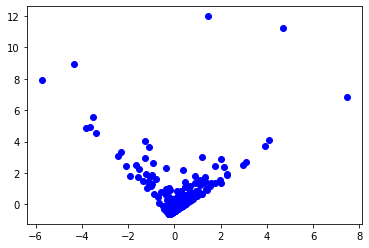

In [19]:
plt.plot(list(acpca_data2['PC1'].values), list(acpca_data2['PC2'].values), 'bo')

In [20]:
X = acpca_arr2[:,0].reshape(1, -1).T
Y = acpca_arr2[:,1].reshape(1, -1).T
reg = lm.LinearRegression().fit(X,Y)
reg.score(X,Y)

0.004950829433576387

### Lambda=20

0.010163187503306692

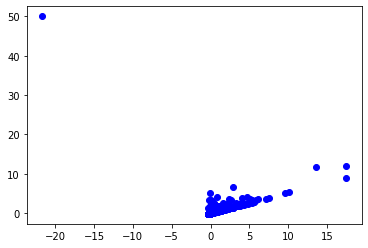

In [90]:
acpca_data3 = pd.read_csv('./data_ACPCA_3.csv')
acpca_arr3 = acpca_data3.to_numpy()
plt.plot(list(acpca_data3['PC1'].values), list(acpca_data3['PC2'].values), 'bo')
X = acpca_arr3[:,0].reshape(1, -1).T
Y = acpca_arr3[:,1].reshape(1, -1).T
reg = lm.LinearRegression().fit(X,Y)
reg.score(X,Y)

In [82]:
# acpca_data = pd.read_csv('./data_ACPCA.csv')
# acpca_data.head()

,PC1,PC2
0,0.449140,0.031528
1,-0.395253,0.087221
2,0.111709,0.008708
3,0.712212,0.038177
4,0.555608,0.034009


In [91]:
# plt.plot(list(acpca_data['PC1'].values), list(acpca_data['PC2'].values), 'bo')

In [92]:
# acpca_arr = acpca_data.to_numpy()
# acpca_arr

In [93]:
# X = acpca_arr[:,0].reshape(1, -1).T
# Y = acpca_arr[:,1].reshape(1, -1).T
# print(X)
# print(Y)

In [94]:
# reg = lm.LinearRegression().fit(X,Y)
# reg.score(X,Y)